In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import pylab
import math
import random
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from pyod.models.knn import KNN
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor

%matplotlib inline

In [2]:
df=pd.read_excel('D:\Стас\Ученье - Свет\Оценка\Аспирантура\Видео по NN, Data mining, ABC и т.д\Распределение Гаусса, регрессия\Python\!Наработки\Квартиры Киров/Квартиры_Киров_выбока_2.xlsx', sheet_name = 0)
df.head()

,Комнатность,LN(Общая площадь),Общая площадь,Площадь кухни,Жилая площадь,Этаж 1,Этаж 2,Этажей в доме,Ремонт,Материал стен,...,последний,средний,деревянный,кирпичный,монолитный,панельный,дизайнерский,евро,косметический,требует ремонта
0,2к,3.799974,44.7,5.900000,29.458690,5,последний,5,евро,панельный,...,1,0,0,0,0,1,0,1,0,0
1,1к,3.465736,32.0,6.900000,17.655975,2,средний,5,косметический,кирпичный,...,0,1,0,1,0,0,0,0,1,0
2,студия,3.502550,33.2,6.633333,18.193506,3,последний,3,евро,кирпичный,...,1,0,0,1,0,0,0,1,0,0
3,2к,3.943522,51.6,8.800000,28.744021,6,средний,7,евро,кирпичный,...,0,1,0,1,0,0,0,1,0,0
4,3к,3.998201,54.5,18.000000,27.597229,18,средний,19,дизайнерский,панельный,...,0,1,0,0,0,1,1,0,0,0


1. Выборка 1 - без исключения выбросов (с учетом нормализации и стандартизации).
2. Выборка 2 - исключение экстремальных выбросов.
3. Выборка 3 - исключение выбросов по общей площади и цене.
4. Выборка 4 - исключение выбросов по логарифмированным общей площади и цене.
5. Выборка 5 - исключение выбросов алгоритмом KNN.

<font size = 3><div style="text-align: justify">**Выборка 1:**</div></font>

In [12]:
df_v1 = df.copy()
len(df_v1)

2399

In [13]:
#X = df_v1[['Общая площадь', 'Площадь кухни', 'Жилая площадь', 'Этажей в доме', 
#           'Хронологический возраст', 'Долгота', 'Широта', 'pca(координата)', 'Тип санузла 2', 
#           '1к', '2к', '3к', '4к и более', 'студия', 'первый', 'последний', 'средний', 
#           'деревянный', 'кирпичный', 'монолитный', 'панельный', 
#           'дизайнерский', 'евро', 'косметический', 'требует ремонта']]
X = df_v1[['LN(Общая площадь)', 'Площадь кухни', 'Жилая площадь', 'Этажей в доме', 
           'Хронологический возраст', 'Долгота', 'Широта', 'Тип санузла 2', 
           '1к', '2к', '3к', '4к и более', 'студия', 'первый', 'последний', 'средний', 
           'деревянный', 'кирпичный', 'монолитный', 'панельный', 
           'дизайнерский', 'евро', 'косметический', 'требует ремонта']]

#Y = df_v1['Цена']
Y = df_v1['LN(Цена)']

X = np.array(X)
Y = np.array(Y)

# Делим имеющуюся выборку на обучающую и тестовую
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [14]:
mean = X_train.mean(axis = 0) # вычисляем среднее
X_train -= mean # отнимаем среднее
std = X_train.std(axis = 0) # вычисляем стандартное отклонение
X_train /= std # делим на стандартное отклонение

# для подготовки тестовых данных делаем аналогично
X_test -= mean # отнимаем
X_test /= std # делим

In [70]:
mlpr = MLPRegressor(hidden_layer_sizes = (256, 64, 32), #существенно влияет
                    activation = 'relu', 
                    solver = 'adam', 
                    alpha = 2, #существенно влияет
                    #batch_size = 'auto',
                    #learning_rate = 'constant', 
                    #learning_rate_init = 0.001, 
                    #power_t = 0.5, 
                    max_iter = 2000, #существенно влияет
                    shuffle = True,
                    random_state = 1, 
                    #tol = 0.0001, 
                    verbose = False, 
                    #warm_start = False, 
                    #momentum = 0.9, 
                    #nesterovs_momentum = True,
                    #early_stopping = False,
                    beta_1 = 0.9, 
                    beta_2 = 0.999, 
                    epsilon = 1e-08)

# alpha: параметры L2: MLP может поддерживать регуляризацию, по умолчанию используется L2, необходимо настроить 
#определенные параметры
# hidden_layer_sizes = (5, 2) скрытый слой 2 слоя, первый слой 5 нейронов, второй слой 2 нейрона), 2 скрытых слоя, 
#есть 3 слоя нейронной сети
#clf = MLPRegressor(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
# «идентичность», без активации операции, полезно для достижения линейных узких мест, возврат f (x) = x
# 'logistic', функция логистической сигмоиды, возвращает f (x) = 1 / (1 + exp (-x)).
# 'tanh', гиперболическая функция tan, возвращает f (x) = tanh (x).
# 'relu', линейная единичная функция после выпрямления, возвращает f (x) = max (0, x)

mlpr.fit(X_train, Y_train)

pred_train = mlpr.predict(X_train)
mse_train = mse(Y_train, pred_train)

print(f'Train R2 {r2_score(Y_train, pred_train):.3f}')
#print(f'MSE на обучении {mse_train:.2f}')
print("MAE на обучении:", round(mae(Y_train, pred_train), 4))

pred_test = mlpr.predict(X_test)
mse_test = mse(Y_test, pred_test)

print(f'Test R2 {r2_score(Y_test, pred_test):.3f}')
#print(f'MSE на тесте {mse_test:.2f}')
print("MAE на тесте:", round(mae(Y_test, pred_test), 4))

Train R2 0.908
MAE на обучении: 0.117
Test R2 0.893
MAE на тесте: 0.1283


In [71]:
params = mlpr.get_params()
params

{'activation': 'relu',
 'alpha': 2,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (256, 64, 32),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 2000,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 1,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

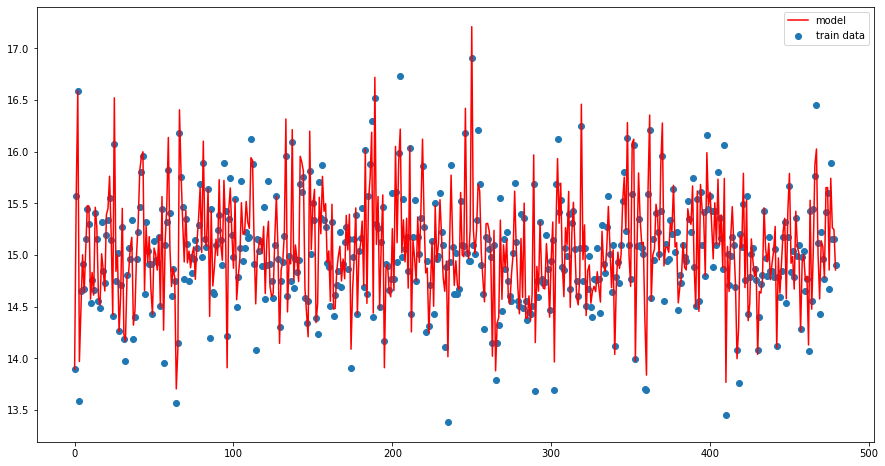

In [73]:
plt.figure(figsize=(15, 8))
plt.plot(range(len(Y_test)), pred_test, c='r', label='model');
plt.scatter(range(len(Y_test)), Y_test, label='train data')
plt.legend();

In [74]:
cv_score = cross_val_score(mlpr, X_train, Y_train, cv = 5)
print("CV mean score:", cv_score.mean())

CV mean score: 0.8450724256911345


<font size = 3><div style="text-align: justify">**Вывод по выборке 1:**</div></font>

На выборке 1 получилось отличное качество модели.

<font size = 3><div style="text-align: justify">**Выборка 2:**</div></font>

In [81]:
df_v2 = df.copy()
len(df_v2)

2399

In [82]:
df_v2 = df.loc[df['Общая площадь'] < 175]
df_v2 = df_v2.loc[df_v2['Площадь кухни'] < 45]
df_v2 = df_v2.loc[df_v2['Жилая площадь'] < 80]
df_v2 = df_v2.loc[df_v2['Хронологический возраст'] < 100]
df_v2 = df_v2.loc[df_v2['Цена'] < 14800000]
len(df_v2)

2367

In [83]:
#X = df_v2[['Общая площадь', 'Площадь кухни', 'Жилая площадь', 'Этаж 1', 'Этажей в доме', 
#           'Хронологический возраст', 'Долгота', 'Широта', 'pca(координата)', 'Тип санузла 2', 
#           '1к', '2к', '3к', '4к и более', 'студия', 'первый', 'последний', 'средний', 
#           'деревянный', 'кирпичный', 'монолитный', 'панельный', 
#           'дизайнерский', 'евро', 'косметический', 'требует ремонта']]
X = df_v2[['LN(Общая площадь)', 'Площадь кухни', 'Жилая площадь', 'Этажей в доме', 
           'Хронологический возраст', 'Долгота', 'Широта', 'Тип санузла 2', 
           '1к', '2к', '3к', '4к и более', 'студия', 'первый', 'последний', 'средний', 
           'деревянный', 'кирпичный', 'монолитный', 'панельный', 
           'дизайнерский', 'евро', 'косметический', 'требует ремонта']]

#Y = df_v2['Цена']
Y = df_v2['LN(Цена)']

X = np.array(X)
Y = np.array(Y)

# Делим имеющуюся выборку на обучающую и тестовую
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [84]:
mean = X_train.mean(axis = 0) # вычисляем среднее
X_train -= mean # отнимаем среднее
std = X_train.std(axis = 0) # вычисляем стандартное отклонение
X_train /= std # делим на стандартное отклонение

# для подготовки тестовых данных делаем аналогично
X_test -= mean # отнимаем
X_test /= std # делим

In [85]:
mlpr = MLPRegressor(hidden_layer_sizes = (256, 64, 32), #существенно влияет
                    activation = 'relu', 
                    solver = 'adam', 
                    alpha = 2, #существенно влияет
                    #batch_size = 'auto',
                    #learning_rate = 'constant', 
                    #learning_rate_init = 0.001, 
                    #power_t = 0.5, 
                    max_iter = 2000, #существенно влияет
                    shuffle = True,
                    random_state = 1, 
                    #tol = 0.0001, 
                    verbose = False, 
                    #warm_start = False, 
                    #momentum = 0.9, 
                    #nesterovs_momentum = True,
                    #early_stopping = False,
                    beta_1 = 0.9, 
                    beta_2 = 0.999, 
                    epsilon = 1e-08)

# alpha: параметры L2: MLP может поддерживать регуляризацию, по умолчанию используется L2, необходимо настроить 
#определенные параметры
# hidden_layer_sizes = (5, 2) скрытый слой 2 слоя, первый слой 5 нейронов, второй слой 2 нейрона), 2 скрытых слоя, 
#есть 3 слоя нейронной сети
#clf = MLPRegressor(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
# «идентичность», без активации операции, полезно для достижения линейных узких мест, возврат f (x) = x
# 'logistic', функция логистической сигмоиды, возвращает f (x) = 1 / (1 + exp (-x)).
# 'tanh', гиперболическая функция tan, возвращает f (x) = tanh (x).
# 'relu', линейная единичная функция после выпрямления, возвращает f (x) = max (0, x)

mlpr.fit(X_train, Y_train)

pred_train = mlpr.predict(X_train)
mse_train = mse(Y_train, pred_train)

print(f'Train R2 {r2_score(Y_train, pred_train):.3f}')
#print(f'MSE на обучении {mse_train:.2f}')
print("MAE на обучении:", round(mae(Y_train, pred_train), 4))

pred_test = mlpr.predict(X_test)
mse_test = mse(Y_test, pred_test)

print(f'Test R2 {r2_score(Y_test, pred_test):.3f}')
#print(f'MSE на тесте {mse_test:.2f}')
print("MAE на тесте:", round(mae(Y_test, pred_test), 4))

Train R2 0.860
MAE на обучении: 0.1509
Test R2 0.812
MAE на тесте: 0.1727


<font size = 3><div style="text-align: justify">**Вывод по выборке 2:**</div></font>

Исключение экстремальных выбросов из данных не привело к улучшению модели.

<font size = 3><div style="text-align: justify">**Выборка 3, 4, 5:**</div></font>

Исключение выбросов также приведет к ухудшению модели.